<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  

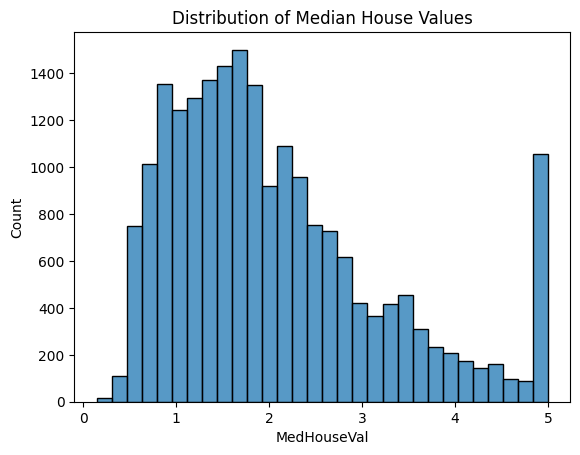

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

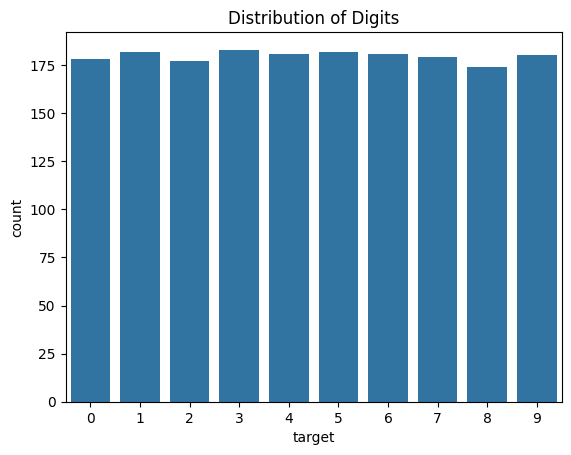

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, fetch_california_housing

# Load the digits dataset
digits = load_digits()
digits_df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
digits_df['target'] = digits.target


# Load the California housing dataset
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

# EDA for California housing dataset
print(housing_df.info())
print("\n")
print(housing_df.head())
print("\n")
print(housing_df.describe())
print("\n")
sns.histplot(housing_df['MedHouseVal'], bins=30)
plt.title('Distribution of Median House Values')
plt.show()

# EDA for digits dataset
print(digits_df.info())
print("\n")
print(digits_df.describe())
print("\n")
sns.countplot(x='target', data=digits_df)
plt.title('Distribution of Digits')
plt.show()

Decision Tree Accuracy: 85.00%
Random Forest Accuracy: 97.50%




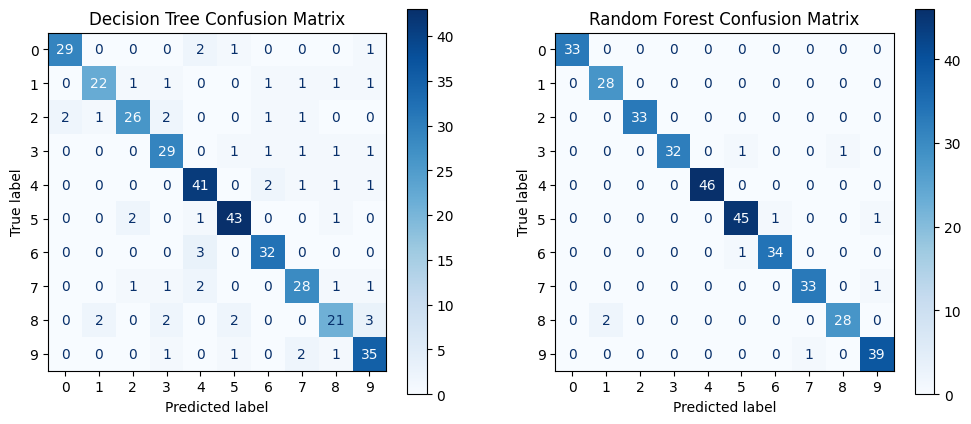

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print accuracy scores
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\n")

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(dt_cm).plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(rf_cm).plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title('Random Forest Confusion Matrix')

plt.show()

Tuned Decision Tree Accuracy: 86.39%
Tuned Random Forest Accuracy: 97.50%


Tuned Decision Tree Confusion Matrix:
[[29  0  0  0  2  1  0  0  0  1]
 [ 0 21  1  0  3  0  0  1  1  1]
 [ 0  1 26  2  2  0  0  1  1  0]
 [ 0  0  0 30  0  0  1  0  1  2]
 [ 0  2  0  0 41  0  0  3  0  0]
 [ 0  0  0  1  1 45  0  0  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  2  2  0  0 30  0  0]
 [ 1  3  0  1  2  1  0  0 20  2]
 [ 0  0  0  3  0  0  0  2  0 35]]


Tuned Random Forest Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


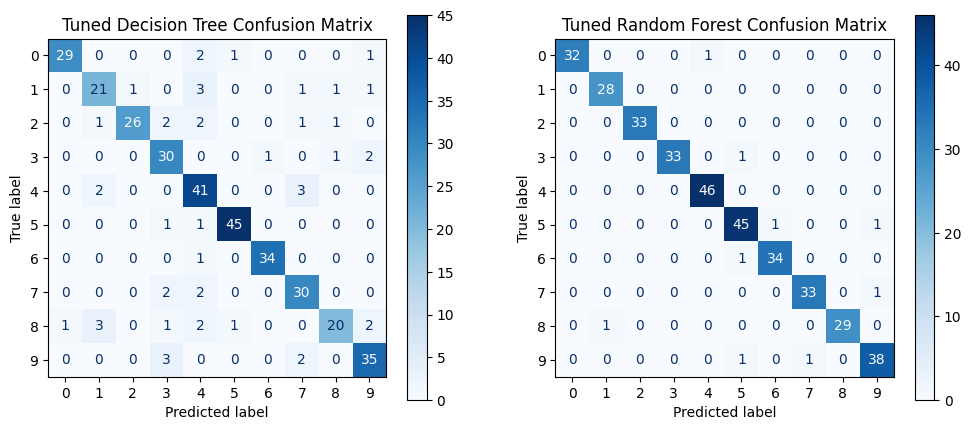

In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tuning Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
y_pred_dt_tuned = dt_grid_search.predict(X_test)

# Tuning Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
y_pred_rf_tuned = rf_grid_search.predict(X_test)

# Calculate accuracy for tuned models
dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)

# Print accuracy scores
print(f"Tuned Decision Tree Accuracy: {dt_tuned_accuracy * 100:.2f}%")
print(f"Tuned Random Forest Accuracy: {rf_tuned_accuracy * 100:.2f}%")
print("\n")
# Print Confusion Matrices
print("Tuned Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_tuned))
print("\n")
print("Tuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt_tuned)
ConfusionMatrixDisplay(dt_cm).plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('Tuned Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf_tuned)
ConfusionMatrixDisplay(rf_cm).plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title('Tuned Random Forest Confusion Matrix')

plt.show()

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset
X_housing = housing.data
y_housing = housing.target
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_housing, y_train_housing)
y_pred_dt_reg = dt_regressor.predict(X_test_housing)

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_housing, y_train_housing)
y_pred_rf_reg = rf_regressor.predict(X_test_housing)

# Metrics
print("Decision Tree Regression MSE:", mean_squared_error(y_test_housing, y_pred_dt_reg))
print("Decision Tree R^2:", r2_score(y_test_housing, y_pred_dt_reg))
print("Random Forest Regression MSE:", mean_squared_error(y_test_housing, y_pred_rf_reg))
print("Random Forest R^2:", r2_score(y_test_housing, y_pred_rf_reg))

Decision Tree Regression MSE: 0.4950806416996609
Decision Tree R^2: 0.6221937960435375
Random Forest Regression MSE: 0.2540368314402719
Random Forest R^2: 0.8061392773870548


Tuned Decision Tree Accuracy: 83.89%
Tuned Random Forest Accuracy: 98.33%
Tuned Decision Tree Confusion Matrix:
[[29  0  1  0  1  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 1  0 24  3  2  0  1  1  1  0]
 [ 0  0  1 30  1  0  0  0  1  1]
 [ 0  0  1  0 40  1  2  1  1  0]
 [ 0  0  4  0  1 40  1  0  1  0]
 [ 0  0  0  0  3  0 32  0  0  0]
 [ 0  0  0  1  2  0  0 30  0  1]
 [ 0  2  1  2  0  1  0  0 21  3]
 [ 0  0  0  2  1  0  0  2  1 34]]
Tuned Random Forest Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


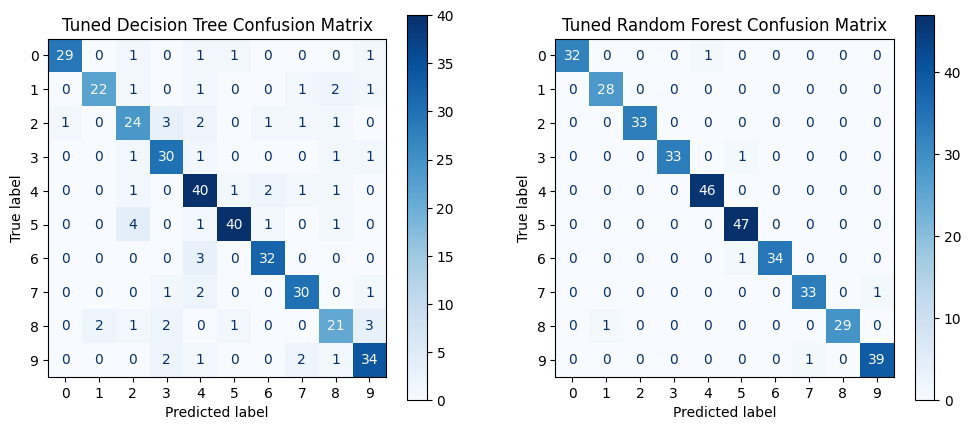

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tuning Decision Tree using RandomizedSearchCV
dt_param_dist = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(), dt_param_dist, n_iter=3, cv=3, random_state=42)
dt_random_search.fit(X_train, y_train)
y_pred_dt_tuned = dt_random_search.predict(X_test)

# Tuning Random Forest using RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_dist, n_iter=3, cv=3, random_state=42)
rf_random_search.fit(X_train, y_train)
y_pred_rf_tuned = rf_random_search.predict(X_test)

# Calculate accuracy for tuned models
dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)

# Print accuracy scores
print(f"Tuned Decision Tree Accuracy: {dt_tuned_accuracy * 100:.2f}%")
print(f"Tuned Random Forest Accuracy: {rf_tuned_accuracy * 100:.2f}%")

# Print Confusion Matrices
print("Tuned Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_tuned))
print("Tuned Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, y_pred_dt_tuned)
ConfusionMatrixDisplay(dt_cm).plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title('Tuned Decision Tree Confusion Matrix')

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf_tuned)
ConfusionMatrixDisplay(rf_cm).plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title('Tuned Random Forest Confusion Matrix')

plt.show()

In [28]:
# Feature Importance for Classification
print("Decision Tree Feature Importance:")
print(dt_classifier.feature_importances_)
print("\n")
print("Random Forest Feature Importance:")

print(rf_classifier.feature_importances_)
print("\n")

# Feature Importance for Regression
print("Decision Tree Regressor Feature Importance:")
print(dt_regressor.feature_importances_)
print("\n")
print("Random Forest Regressor Feature Importance:")
print(rf_regressor.feature_importances_)

Decision Tree Feature Importance:
[0.         0.01036013 0.00451836 0.00569966 0.00243391 0.05963066
 0.         0.         0.         0.00103113 0.03424813 0.00077334
 0.0116301  0.00564541 0.00292152 0.         0.00153196 0.
 0.01859643 0.01277246 0.05068993 0.10083092 0.00123735 0.
 0.00151764 0.00077334 0.07175765 0.06311472 0.00736352 0.00434546
 0.0091637  0.         0.         0.05878518 0.00221174 0.00625672
 0.07837266 0.01672474 0.00365746 0.         0.         0.00269306
 0.13063307 0.04837164 0.00077334 0.         0.01559676 0.
 0.         0.0021267  0.00709405 0.00858535 0.0007347  0.00123735
 0.01724102 0.00152988 0.         0.         0.00588908 0.00077334
 0.06531677 0.03235316 0.00144358 0.00901124]


Random Forest Feature Importance:
[0.00000000e+00 2.70631473e-03 2.14913233e-02 1.05092028e-02
 1.00978014e-02 1.64898689e-02 8.04677766e-03 8.26333795e-04
 6.37017762e-05 1.02515402e-02 2.73231438e-02 5.72023318e-03
 1.54534256e-02 2.61916936e-02 4.56128411e-03 5.3795671